In [78]:
# !wget http://cb.lk/covid_19

In [79]:
# !unzip covid_19

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout ,Activation



(1482, 1989, 3)

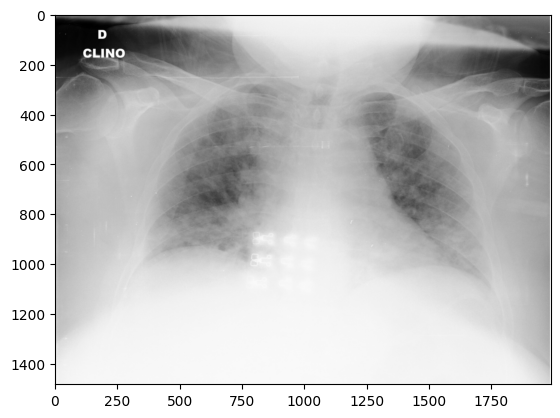

In [81]:
img1 = image.load_img('/content/CovidDataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')
plt.imshow(img1)
image.img_to_array(img1).shape

In [82]:
train_datagen = ImageDataGenerator(
    rescale = 1/255
    # horizontal_flip = True,
    # zoom_range = 0.2,
    # shear_range = 0.2
)

val_datagen = ImageDataGenerator(
    rescale = 1/255
)

training_set = train_datagen.flow_from_directory(
    directory = '/content/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'binary'
)

val_set = val_datagen.flow_from_directory(
    directory = '/content/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)



Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [83]:
training_set.image_shape

(224, 224, 3)

In [84]:
model = Sequential()
model.add(Conv2D(filters= 32,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters= 64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=10,batch_size=32 ,validation_data=val_set)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 898ms/step - accuracy: 0.5198 - loss: 4.1147 - val_accuracy: 0.5000 - val_loss: 2.1220
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 915ms/step - accuracy: 0.6092 - loss: 1.1241 - val_accuracy: 0.6667 - val_loss: 0.4287
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 719ms/step - accuracy: 0.8652 - loss: 0.3105 - val_accuracy: 0.9500 - val_loss: 0.2317
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 699ms/step - accuracy: 0.9517 - loss: 0.1665 - val_accuracy: 0.9500 - val_loss: 0.1462
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 815ms/step - accuracy: 0.9783 - loss: 0.0596 - val_accuracy: 0.9667 - val_loss: 0.0864
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 706ms/step - accuracy: 1.0000 - loss: 0.0214 - val_accuracy: 0.9667 - val_loss: 0.1218
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9982 - loss: 0.0082 - val_accuracy: 0.9667 - val_loss: 0.1719
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 705ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 0.9667 - val_loss: 0.

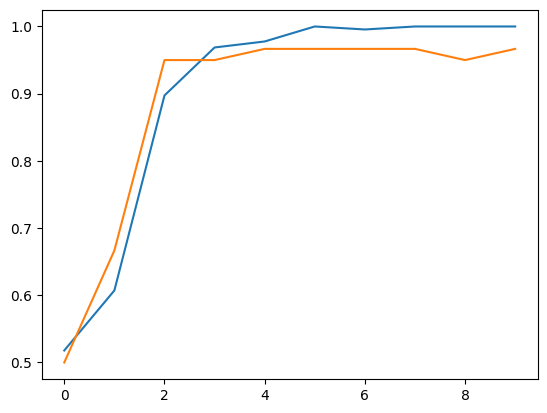

In [86]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])

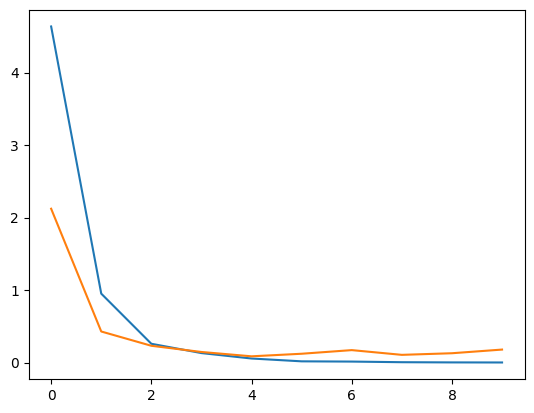

In [87]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 420ms/step


<Axes: >

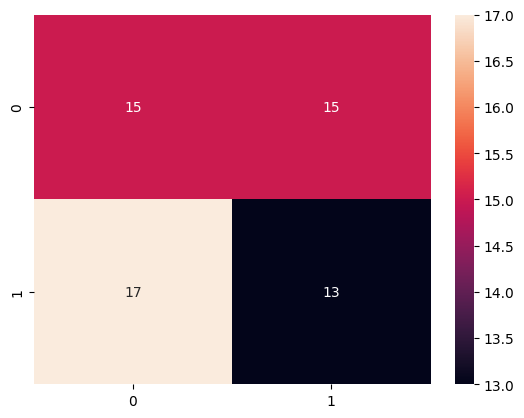

In [88]:
y_pred = model.predict(val_set , batch_size=30 , )
y_pred = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(val_set.classes, y_pred)
sns.heatmap(cm, annot=True)

# model.evaluate(val_set)
# print(y_pred)
# print(val_set.classes)

In [96]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(val_set.classes, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.50      0.48        30
           1       0.46      0.43      0.45        30

    accuracy                           0.47        60
   macro avg       0.47      0.47      0.47        60
weighted avg       0.47      0.47      0.47        60



In [89]:
# augmentation

x_aug = ImageDataGenerator(
    rescale = 1/255,
    width_shift_range = [-20 , 20]

    )

shape after expand = (1, 1209, 1488, 3)


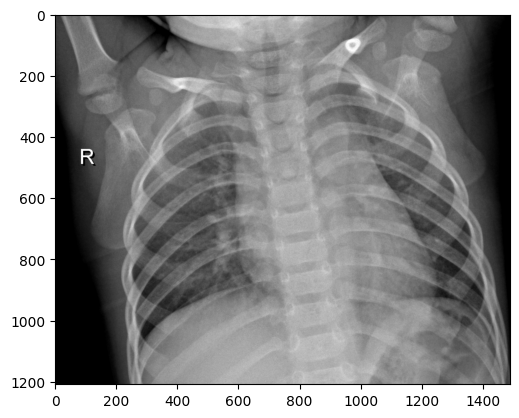

In [94]:
img1 = image.load_img('/content/CovidDataset/Train/Normal/IM-0156-0001.jpeg')
plt.imshow(img1)
data = image.img_to_array(img1)
samples = np.expand_dims(data,0)
datagen = ImageDataGenerator(width_shift_range = [-100 , 100])
print('shape after expand =' , samples.shape)
it = datagen.flow(samples,batch_size=1)


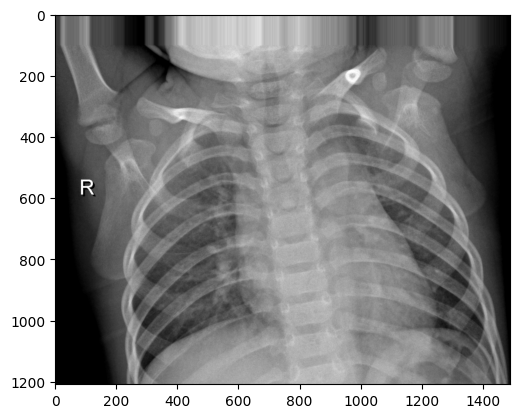

In [95]:
batch = next(it)
image = batch[0].astype('uint8')
plt.imshow(image)